In [117]:
import numpy as np
import matplotlib.pyplot as plt

# a )
$x^2+y^2+z^2=1$

x$\in$ [0,1]

y$\in[0,\sqrt{1-x^2}]$

z$\in[0,\sqrt{1-x^2-y^2}]$

so

y$_1$(x)=$\sqrt{1-x^2}$ $\tag{1}$

z$_1$(x,y)=$\sqrt{1-x^2-y^2}$  $\tag{2}$

So we need to integrate
\begin{equation}
V=8\int_0^1dx\int_0^{\sqrt{1-x^2}}dy\int_0^{\sqrt{1-x^2-y^2}}dz   \tag{3}
\end{equation}

# b)
Integral over $z$ is simple 
\begin{equation}
F(x,y)=\int_0^{\sqrt{1-x^2-y^2}}dz =\sqrt{1-x^2-y^2}  \tag{4}
\end{equation}

Then
\begin{equation}
G(x)=\int_0^{\sqrt{1-x^2}}\sqrt{1-x^2-y^2}dy
\end{equation}

In [118]:
def Integ_underdy(x,y):
    return np.sqrt(1-x**2-y**2)

In [119]:
def G(x):
    y2=np.sqrt(1-x**2)
    return Traped(Integ_underdy(x),0,y2,100)

# c)
Numerical calculation of Volume by Trapezoidal rule

In [126]:
def Traped(func,h):
    result=h/2.0*(func[0]+func[-1])+h*np.sum(func[1:-1])
    return result

In [127]:
x_step=np.linspace(0,1,100)     # fixed N=100 steps for x and y
G_elements = np.zeros_like(x_step)
for i in range(100):
    x=x_step[i]
    y_step=np.linspace(0,np.sqrt(1-x**2),100)   # we calculate y_i for each x
    F=np.sqrt(np.clip(1-x**2-y_step**2,0,None))      # and F(x,y) also calculated for each x_i and y_i
    h=y_step[1]-y_step[0]       #interval   length
    G=Traped(F,h)       
    G_elements[i]=G                              # we store each element of G(x) here
h_x=x_step[1]-x_step[0]                   # again step interval for x
Res=Traped(G_elements,h_x)        # trapezoidal rule for final integral over x
Numer_Res=8.0*Res
print(Numer_Res)

4.187092098813584


In [128]:
Exact=4.0/3.0 *np.pi
print(Exact)

4.1887902047863905


In [129]:
Relative_err=abs(Numer_Res-Exact)/Exact
print(Relative_err)

0.0004053929391990939


# d)

In [130]:
from timeit import default_timer as timer
time_taken=[]
Result_for_diff_N=[]
Intervals=[]
for N in range(10,10000,1000):
    start = timer()
    x_step=np.linspace(0,1,N)     # fixed N=100 steps for x and y
    G_elements = np.zeros_like(x_step)
    for i in range(N):
        x=x_step[i]
        y_step=np.linspace(0,np.sqrt(1-x**2),N)   # we calculate y_i for each x
        F=np.sqrt(np.clip(1-x**2-y_step**2,0,None))      # and F(x,y) also calculated for each x_i and y_i
        h=y_step[1]-y_step[0]       #interval   length
        G=Traped(F,h)       
        G_elements[i]=G                              # we store each element of G(x) here
    h_x=x_step[1]-x_step[0]                   # again step interval for x
    Res=Traped(G_elements,h_x)        # trapezoidal rule for final integral over x
    Numer_Res=8.0*Res
    Result_for_diff_N.append(Numer_Res)
    Intervals.append(N)
    end = timer()
    time_taken.append(end-start)
 

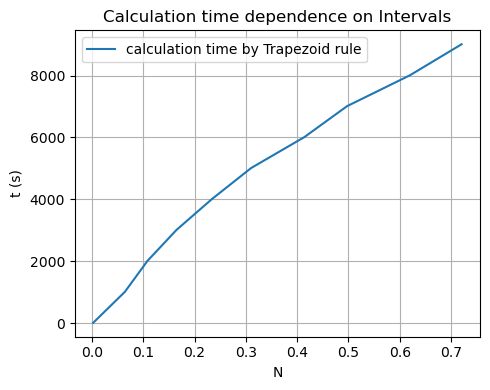

In [131]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax.plot(time_taken,Intervals,label='calculation time by Trapezoid rule')
ax.set_title('Calculation time dependence on Intervals')
ax.set_ylabel('t (s)')
ax.set_xlabel('N')
ax.legend(loc='best')
plt.grid()
fig.tight_layout()
plt.show()
